## TP1
### Équipe 10
### Fabrice Charbonneau (1798064)
### Sanou Armel Kenzanga Landry (1976804)

## 1: Quelle est la moyenne des votes par profession ("job") et par âge? (2 points)

In [1]:
### Lecture des données
user <- read.csv(file='u.user.csv', sep='|', header=T)
item <- read.csv(file='u.item.csv', sep='|', header=T)
data <- read.csv(file='u.data.csv', sep='|', header=T)

In [2]:
# merge des dataframes en un seul
colnames(user)[colnames(user)=="id"] <- "user.id"
colnames(item)[colnames(item)=="movie.id"] <- "item.id"

allData <- merge(x=data,y=user,by="user.id",all=TRUE)
allData <- merge(x=allData,y=item,by="item.id",all=TRUE)
allData[1:3,]

item.id user.id rating timestamp age gender job        zip   movie.title     
1 1         1     5      874965758 24  M      technician 85711 Toy Story (1995)
2 1       117     4      880126083 20  M      student    16125 Toy Story (1995)
3 1       429     3      882385785 27  M      student    29205 Toy Story (1995)
  release.date ⋯ Fantasy Film.Noir Horror Musical Mystery Romance Sci.Fi
1 01-Jan-1995  ⋯ 0       0         0      0       0       0       0     
2 01-Jan-1995  ⋯ 0       0         0      0       0       0       0     
3 01-Jan-1995  ⋯ 0       0         0      0       0       0       0     
  Thriller War Western
1 0        0   0      
2 0        0   0      
3 0        0   0

In [3]:
profession_mean = aggregate(allData$rating, list(allData$job), mean)

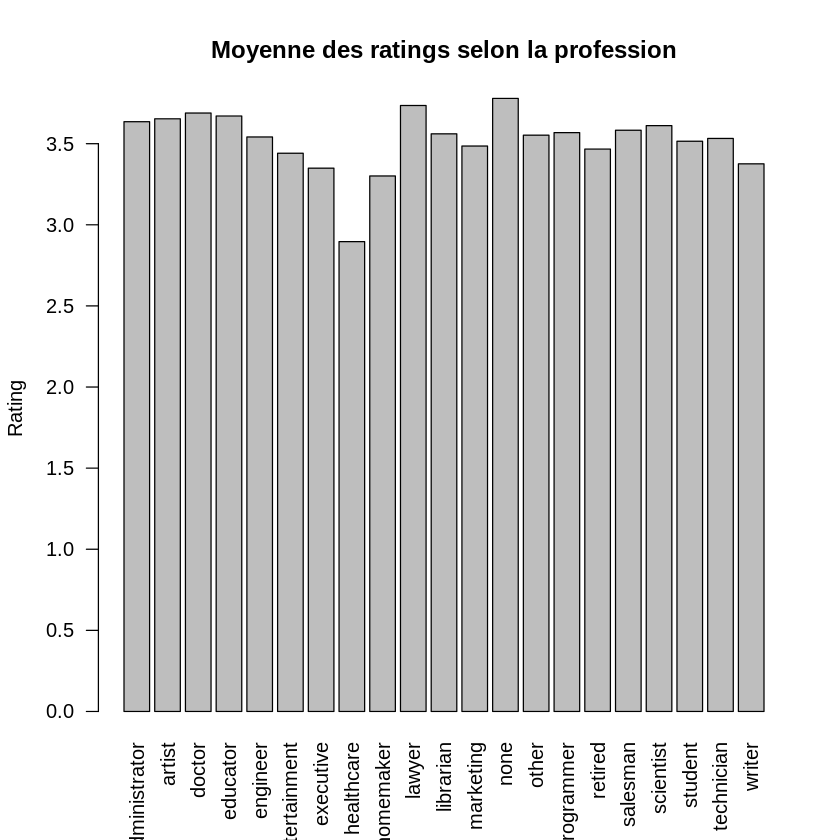

In [4]:
barplot(profession_mean$x,names.arg=profession_mean$Group.1,xlab="",ylab="Rating",
main="Moyenne des ratings selon la profession", las=2)

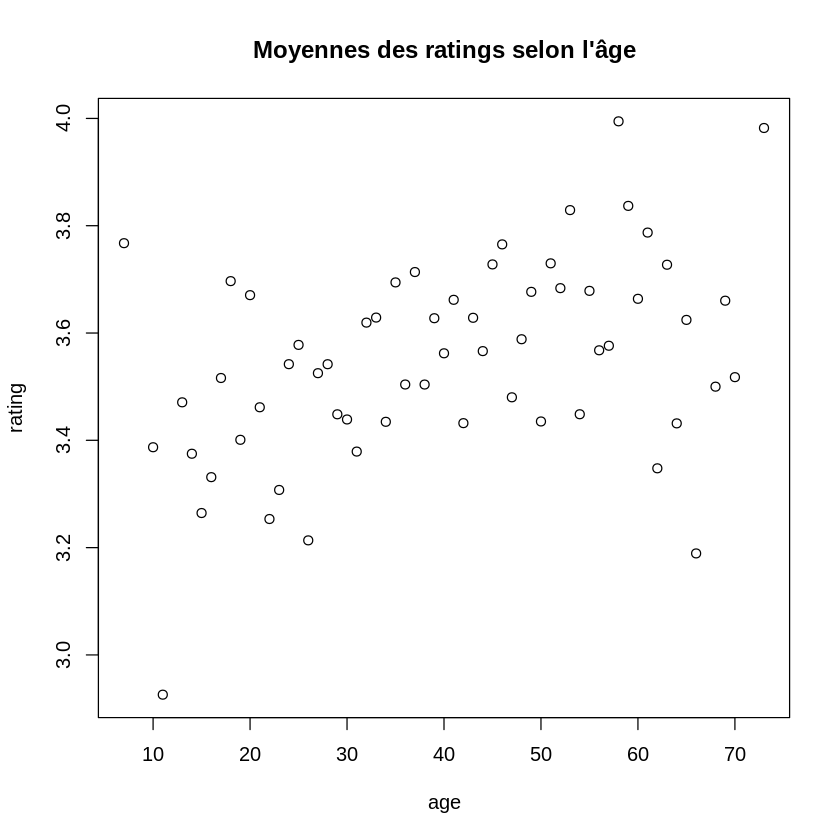

In [5]:
age_mean = aggregate(allData$rating, list(allData$age), mean)
plot(age_mean[,1], age_mean[,2], xlab = "age", 
     ylab = "rating", main="Moyennes des ratings selon l'âge")


## 2: Quels sont les 10 films les plus similaires à "Star Trek V: The Final Frontier (1989)" selon respectivement la mesure du cosinus et de la corrélation avec la matrice de votes.  (3 points)

In [6]:
# Voir les slides pour le principe de corrélation avec cosinus. 
# Dans les slides, on compare des utilisateurs. 
# Pour cette question, on a juste à transposer la matrice (pour faire le calcul sur les items au lieu des utilisateurs)
# Ensuite, on sort les items (films) selon les poids w calculés et on prend les 10 poids les plus grands.

library(Matrix)
	    m <- sparseMatrix(data[,1],data[,2],x=data[,3])
	    rownames(m) <- paste('u', 1:nrow(m), sep='')
	    colnames(m) <- paste('i', 1:ncol(m), sep='')


In [7]:
# transpose matrix to have each line representing a movie
mt <- t(m)
stid <- 450 #le id de star trek 
strow <- t(mt[stid,])

In [8]:
# compute all Wcos for each movie for star trek

cosinus.vm <- function(v,mt) { n <- sqrt(colSums(mt^2)); (v %*% mt)/(n * sqrt(sum(v^2))) }
all.cos <- cosinus.vm(strow, m)

In [103]:
# sort movies by Wcos and get the first 10 (or 11 because star treck itself souldnt count)
all.cos <- all.cos[,order(-all.cos[1,]),drop=F];
all.cos[,1:11]

i450      i449      i227      i229      i230      i228       i62      i380 
1.0000000 0.6080518 0.5533220 0.5455677 0.5144135 0.4702339 0.4540497 0.4204334 
     i226      i636      i679 
0.3984260 0.3804155 0.3779706

In [10]:
# Les 10 films les plus semblables à Star Trek V: The Final Frontier (1989) sont donc:
#item[item[, "item.id"] == 449,2]
item[item[, "item.id"] == 449,2]
item[item[, "item.id"] == 227,2]
item[item[, "item.id"] == 229,2]
item[item[, "item.id"] == 230,2]
item[item[, "item.id"] == 228,2]
item[item[, "item.id"] == 62,2]
item[item[, "item.id"] == 380,2]
item[item[, "item.id"] == 226,2]
item[item[, "item.id"] == 636,2]
item[item[, "item.id"] == 679,2]

[1] Star Trek: The Motion Picture (1979)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek VI: The Undiscovered Country (1991)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek III: The Search for Spock (1984)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek IV: The Voyage Home (1986)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek: The Wrath of Khan (1982)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Stargate (1994)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek: Generations (1994)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Die Hard 2 (1990)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Escape from New York (1981)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Conan the Barbarian (1981)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

In [11]:
# Correlation
# compute all Wcor for each movie for star trek

cor.matrix = cor(as.matrix(m), use='pairwise.complete.obs')


In [93]:
w_list <- order(cor.matrix[,450], decreasing = TRUE)
w_list[1:11]

[1] 450 449 227 229 230 228  62 380 226 636 679

In [95]:
item[w_list[1:11], 2]

[1] Star Trek V: The Final Frontier (1989)       
 [2] Star Trek: The Motion Picture (1979)         
 [3] Star Trek VI: The Undiscovered Country (1991)
 [4] Star Trek III: The Search for Spock (1984)   
 [5] Star Trek IV: The Voyage Home (1986)         
 [6] Star Trek: The Wrath of Khan (1982)          
 [7] Stargate (1994)                              
 [8] Star Trek: Generations (1994)                
 [9] Die Hard 2 (1990)                            
[10] Escape from New York (1981)                  
[11] Conan the Barbarian (1981)                   
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

## 3: Utilisez une approche item-item pour calculer le vote au film "Star Trek V: The Final Frontier (1989)" des utilisateurs qui n'ont pas de vote pour celui-ci. Prenez les 20 voisins les plus rapprochés selon la distance euclidienne et utilisez les cosinus comme poids. Si aucun vote commun existe, alors la valeur prédite est fixée à NA. (3 points)


Note: cette question est incomplète, et nous n'avons pas eu le temps de la terminer afin d'obtenir des prédictions pour chaque user. (C'est seulement le cas pour les questions 3 et 4)

In [129]:
# distance euclidienne entre 2 vecteurs:
euclidian.distance <- function(x1, x2) {
    sqrt(colSums((x1 - x2)^2, na.rm = TRUE))
}


In [136]:
###########################################################
##Question 3 : Approche Item Item
## Cosinus entre un vecteur v et chaque colonne dela matrice m
m[m==0] <- NA

cosinus.vm <- function(v,m) { n <- sqrt(colSums(m^2)); (v %*% m)/(n * sqrt(sum(v^2))) }

sum(m.sparse[,450]>0)

m <- as.matrix(m.sparse)
m[m==0] <- NA
sum(!is.na(m.sparse[,450]))

n.voisins <- 20 + 1
votes.communs <- (colSums((m.sparse[,450] * m.sparse) > 0)) 

## visualisation des distances avec les autres films
distance.na.450 <- sqrt(colSums((m[,450] - m)^2, na.rm=T)) 
distance.450 <- sqrt(colSums((m.sparse[,450] - m.sparse)^2)) 
distance.450[450]            # petite vérification

## calcul Des voisins
(i.distance.450 <- min.nindex(distance.450, n.voisins))

votes.communs[i.distance.450]    

## list des voisins 20 voisins
voisins <- tail(i.distance.450, 20)


## Cosinus
## Fonction qui calcul les cosinus entre les lignes
matrix.cos <- function(m) {
  (m %*% t(m)) / ( t(matrix(sqrt(rowSums(m^2)),nrow(m),nrow(m)))
                   * (sqrt(rowSums(m^2))) )
}
## Calcul des valeurs centrées par rapport aux items
(m.centre <- t(t(m) - colMeans(m[-1,])))
voisins
(w_voisins <- matrix.cos(t(m[-1,]))[450,voisins])
cor(m[-1,])
mean(m[,'i450'], na.rm=T) + 1/sum(abs(w_voisins)) * (w_voisins %*% m.centre[450,voisins])

(m.norm <- scale(m, scale=F))
m.rcos <- function(m) {
  m.vl <- sqrt(rowSums(m^2))
  ( m %*% t(m) ) / (m.vl %o% m.vl)
}
(m.norm.cos <- m.rcos(m.norm[,-1]))
sum(abs(m.rcos(m.norm[,-1])[c(2,4),450]))

## Estimation du vote
mean(m[450,-1]) + sum(abs(m.norm.cos[c(2,4),450]))^-1 * ( m.norm[c(2,4),450] %*% m.norm.cos[c(2,4),450] )


[1] 63

[1] 943

i450 
   0

[1]  450 1274  901  545 1484  757  666  759 1162 1481 1492 1498  677 1321 1491
[16]  600  668  857 1247 1510 1027

i450 i1274  i901  i545 i1484  i757  i666  i759 i1162 i1481 i1492 i1498  i677 
   63     8     5     9     3     3     3     7     2     2     1     1     1 
i1321 i1491  i600  i668  i857 i1247 i1510 i1027 
    1     1     1     4     1     4     1     2

i1 i2 i3 i4 i5 i6 i7 i8 i9 i10 ⋯ i1673 i1674 i1675 i1676 i1677 i1678 i1679
u1   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u2   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u3   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u4   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u5   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u6   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u7   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u8   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u9   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u10  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u11  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u12  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u13  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u14  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u15  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u16  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u17  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u18  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u19  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u20  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u21  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u22  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u23  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u24  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u25  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u26  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u27  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u28  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u29  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u30  NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
⋮    ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮   ⋱ ⋮     ⋮     ⋮     ⋮     ⋮     ⋮     ⋮    
u914 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u915 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u916 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u917 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u918 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u919 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u920 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u921 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u922 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u923 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u924 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u925 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u926 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u927 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u928 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u929 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u930 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u931 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA    NA   
u932 

[1] 1274  901  545 1484  757  666  759 1162 1481 1492 1498  677 1321 1491  600
[16]  668  857 1247 1510 1027

i1274  i901  i545 i1484  i757  i666  i759 i1162 i1481 i1492 i1498  i677 i1321 
   NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA 
i1491  i600  i668  i857 i1247 i1510 i1027 
   NA    NA    NA    NA    NA    NA    NA

i1 i2 i3 i4 i5 i6 i7 i8 i9 i10 ⋯ i1673 i1674 i1675 i1676 i1677 i1678
i1     1 NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i2    NA  1 NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i3    NA NA  1 NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i4    NA NA NA  1 NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i5    NA NA NA NA  1 NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i6    NA NA NA NA NA  1 NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i7    NA NA NA NA NA NA  1 NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i8    NA NA NA NA NA NA NA  1 NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i9    NA NA NA NA NA NA NA NA  1 NA  ⋯ NA    NA    NA    NA    NA    NA   
i10   NA NA NA NA NA NA NA NA NA  1  ⋯ NA    NA    NA    NA    NA    NA   
i11   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i12   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i13   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i14   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i15   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i16   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i17   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i18   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i19   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i20   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i21   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i22   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i23   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i24   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i25   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i26   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i27   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i28   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i29   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i30   NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
⋮     ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮   ⋱ ⋮     ⋮     ⋮     ⋮     ⋮     ⋮    
i1653 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1654 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1655 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1656 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1657 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1658 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1659 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1660 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1661 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1662 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1663 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1664 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1665 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1666 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1667 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1668 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1669 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1670 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1671 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1672 NA NA NA NA NA NA NA NA NA NA  ⋯ NA    NA    NA    NA    NA    NA   
i1673 NA NA NA NA NA NA NA NA NA NA  ⋯  1    NA    NA    NA    NA    NA   
i1674 NA NA NA NA NA NA NA NA N

[,1]
[1,] NA

i1         i2         i3          i4         i5         i6       
u1    1.1216814 -0.2061069 0.9666667   -0.5502392 -0.3023256 1.423077 
u2    0.1216814         NA        NA           NA         NA       NA 
u3           NA         NA        NA           NA         NA       NA 
u4           NA         NA        NA           NA         NA       NA 
u5    0.1216814 -0.2061069        NA           NA         NA       NA 
u6    0.1216814         NA        NA           NA         NA       NA 
u7           NA         NA        NA    1.4497608         NA       NA 
u8           NA         NA        NA           NA         NA       NA 
u9           NA         NA        NA           NA         NA 1.423077 
u10   0.1216814         NA        NA    0.4497608         NA       NA 
u11          NA         NA        NA           NA         NA       NA 
u12          NA         NA        NA    1.4497608         NA       NA 
u13  -0.8783186 -0.2061069        NA    1.4497608 -2.3023256       NA 
u14          NA         NA        NA           NA         NA       NA 
u15  -2.8783186         NA        NA           NA         NA       NA 
u16   1.1216814         NA        NA    1.4497608         NA       NA 
u17   0.1216814         NA        NA           NA         NA       NA 
u18   1.1216814         NA        NA   -0.5502392         NA 1.423077 
u19          NA         NA        NA    0.4497608         NA       NA 
u20  -0.8783186         NA        NA           NA         NA       NA 
u21   1.1216814         NA        NA           NA -1.3023256       NA 
u22          NA -1.2061069        NA    1.4497608         NA       NA 
u23   1.1216814         NA        NA           NA         NA       NA 
u24          NA         NA        NA           NA         NA       NA 
u25   1.1216814         NA        NA           NA         NA       NA 
u26  -0.8783186         NA        NA           NA         NA       NA 
u27          NA         NA        NA           NA         NA       NA 
u28          NA         NA        NA           NA -0.3023256       NA 
u29          NA         NA        NA           NA         NA       NA 
u30          NA -0.2061069        NA           NA         NA       NA 
⋮    ⋮          ⋮          ⋮           ⋮          ⋮          ⋮        
u914         NA         NA          NA         NA         NA        NA
u915         NA         NA          NA         NA         NA        NA
u916  0.1216814 -0.2061069 -0.03333333  0.4497608 -0.3023256        NA
u917 -0.8783186         NA -2.03333333         NA         NA        NA
u918 -0.8783186         NA          NA         NA         NA        NA
u919  0.1216814         NA          NA -2.5502392  0.6976744        NA
u920         NA         NA          NA         NA         NA        NA
u921 -0.8783186         NA          NA         NA         NA        NA
u922  1.1216814         NA          NA         NA         NA        NA
u923 -0.8783186         NA  0.96666667         NA         NA        NA
u924  1.1216814 -0.2061069          NA         NA         NA 0.4230769
u925         NA         NA          NA         NA  0.6976744        NA
u926         NA         NA          NA         NA         NA        NA
u927  1.1216814         NA          NA         NA         NA        NA
u928         NA         NA          NA         NA         NA        NA
u929 -0.8783186         NA          NA         NA         NA        NA
u930 -0.8783186         NA          NA         NA         NA        NA
u931         NA         NA          NA         NA         NA        NA
u932  0.1216814         NA          NA         NA         NA        NA
u933 -0.8783186         NA          NA -0.5502392         NA        NA
u934 -1.8783186  0.7938931          NA  1.4497608         NA        NA
u935 -0.8783186         NA          NA         NA         NA        NA
u936  0.1216814         NA  0.96666667         NA         NA 1.4230769
u937         NA         NA          NA         NA         NA        NA
u938  0.1216814         NA   

u1 u2 u3 u4 u5 u6 u7 u8 u9 u10 ⋯ u934 u935 u936 u937 u938 u939 u940 u941
u1   NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u2   NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u3   NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u4   NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u5   NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u6   NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u7   NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u8   NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u9   NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u10  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u11  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u12  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u13  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u14  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u15  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u16  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u17  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u18  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u19  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u20  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u21  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u22  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u23  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u24  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u25  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u26  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u27  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u28  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u29  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u30  NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
⋮    ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮   ⋱ ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    ⋮   
u914 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u915 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u916 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u917 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u918 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u919 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u920 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u921 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u922 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u923 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u924 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u925 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u926 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u927 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u928 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u929 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u930 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u931 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u932 NA NA NA NA NA NA NA NA NA NA  ⋯ NA   NA   NA   NA   NA   NA   NA   NA  
u933 NA NA NA NA NA NA NA N

[1] NA

[,1]
[1,] NA

## 4: Calculez l'erreur quadratique moyenne des prédiction de l'approche item-item à la question précédente en la comparant aux valeurs observées. (2 points)


Le calcul de l'erreur quadratique est effectué avec la formule suivante:


$\frac{\sum(M_{obs} - M_{pred})²}{n}$



In [124]:
quadratic.error = function(obs, pred) {
    n = colSums((as.matrix(obs) - as.matrix(pred))^2, na.rm = TRUE)[1]
}

In [126]:
total.error <- function(m.obs, m.pred) {
    error <- 0
    n.predictions = 0
    for (i in 1:nrow(m.obs)) {
        user <- m.obs[i,]
        user <- replace(user,user==0,NA)
        error <- error + quadratic.error(user, m.pred[i,])
        n.predictions <- n.predictions + length(user[!is.na(user)])
    }
    error / n.predictions
}

Ces fonctions pourraient en théorie prendre les prédictions de la question précédente et retourner l'erreur quadratique moyenne. 

(Les questions suivantes sont plus complètes que les questions 3 et 4!)

## 5: Utilisez une approche par agglomération pour prédire les votes et calculez l'erreur quadratique moyenne. (4 points)

In [15]:
m

   [[ suppressing 33 column names ‘i1’, ‘i2’, ‘i3’ ... ]]


943 x 1682 sparse Matrix of class "dgCMatrix"
                                                                             
u1   5 3 4 3 3 5 4 1 5 3 2 5 5 5 5 5 3 4 5 4 1 4 4 3 4 3 2 4 1 3 3 5 4 ......
u2   4 . . . . . . . . 2 . . 4 4 . . . . 3 . . . . . 4 . . . . . . . . ......
u3   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
u4   . . . . . . . . . . 4 . . . . . . . . . . . . . . . . . . . . . . ......
u5   4 3 . . . . . . . . . . . . . . 4 . . . 3 . . 4 3 . . . 4 . . . . ......
u6   4 . . . . . 2 4 4 . . 4 2 5 3 . . . 4 . 3 3 4 . . . . 2 . . . 4 . ......
u7   . . . 5 . . 5 5 5 4 3 5 . . . . . . . . . 5 3 . 3 . 4 5 3 . 4 4 . ......
u8   . . . . . . 3 . . . 3 . . . . . . . . . . 5 . . . . . . . . . . . ......
u9   . . . . . 5 4 . . . . . . . . . . . . . . . . . . . . . . . . . . ......
u10  4 . . 4 . . 4 . 4 . 4 5 3 . . 4 . . . . . 5 5 . . . . . . . . 4 4 ......
u11  . . . . . . . 4 5 . 2 2 . . 5 . . . . . . 4 . 3 3 . . 5 3 . . . . ......
u12  . . . 5 . . .

In [16]:
# remove lines and columns that do not contain 4 or more votes 
curated.m = m
for (i in ncol(m):1) {
    if (length(which(curated.m[,i] != 0)) < 4) {
        curated.m <- curated.m[,-i]
    }
}
for (i in nrow(m):1) {
    if (length(which(curated.m[i,] != 0)) < 4) {
        curated.m <- curated.m[-i,]
    }
}

dim(curated.m)
curated.m <- as.matrix(curated.m)

[1]  943 1413

In [18]:
# new matrix filled NA values with mean of row and col

row.means = c()
for (i in nrow(curated.m):1) {
    row = curated.m[i,]
    row.means[i] <- mean(row[row!=0])
}
col.means = c()
for (j in ncol(curated.m):1) {
    col = curated.m[,j]
    col.means[j] <- mean(col[col!=0])
}

In [19]:
m.means = outer(row.means, col.means, function(x,y) (x+y)/2)
mean.filled.m = as.matrix(is.na(replace(curated.m,curated.m==0,NA))*m.means + curated.m)
mean.filled.m

i1       i2       i3       i4       i5       i6       i7       i8      
u1   5.000000 3.000000 4.000000 3.000000 3.000000 5.000000 4.000000 1.000000
u2   4.000000 3.457892 3.371505 3.629958 3.506002 3.643300 3.754073 3.852556
u3   3.337307 3.001202 2.914815 3.173268 3.049311 3.186610 3.297383 3.395865
u4   4.105826 3.769720 3.683333 3.941786 3.817829 3.955128 4.065901 4.164384
u5   4.000000 3.000000 2.953810 3.212262 3.088306 3.225604 3.336378 3.434860
u6   4.000000 3.420589 3.334202 3.592655 3.468698 3.605997 2.000000 4.000000
u7   3.926659 3.590553 3.504167 5.000000 3.638663 3.775962 5.000000 5.000000
u8   3.837464 3.501359 3.414972 3.673425 3.549468 3.686767 3.000000 3.896022
u9   4.075523 3.739417 3.653030 3.911483 3.787526 5.000000 4.000000 4.134081
u10  4.000000 3.706879 3.620492 4.000000 3.754988 3.892287 4.000000 4.101542
u11  3.671203 3.335098 3.248711 3.507164 3.383207 3.520506 3.631279 4.000000
u12  4.135238 3.799132 3.712745 5.000000 3.847241 3.984540 4.095313 4.193795
u13  3.000000 3.000000 3.079167 5.000000 1.000000 3.350962 2.000000 4.000000
u14  3.985078 3.648972 3.562585 3.821038 3.697081 3.834380 5.000000 4.043635
u15  1.000000 3.040553 2.954167 3.212620 3.088663 3.225962 1.000000 3.435217
u16  5.000000 3.767339 3.680952 5.000000 3.815449 3.952747 5.000000 5.000000
u17  4.000000 3.120911 3.034524 3.292977 3.169020 3.306319 4.000000 3.515574
u18  5.000000 3.545082 3.458696 3.000000 3.593192 5.000000 3.841264 5.000000
u19  3.714159 3.378053 3.291667 4.000000 3.426163 3.563462 3.674235 5.000000
u20  3.000000 3.155137 3.068750 3.327203 3.203246 3.340545 3.451318 3.549800
u21  5.000000 2.942036 2.855650 3.114103 2.000000 3.127445 5.000000 3.336700
u22  3.614941 2.000000 3.192448 5.000000 3.326944 3.464243 3.575016 3.673498
u23  5.000000 3.420934 3.334547 3.593000 3.469044 3.606342 4.000000 4.000000
u24  4.100924 3.764818 3.678431 3.936884 3.812927 3.950226 4.000000 5.000000
u25  5.000000 3.628694 3.542308 3.800761 3.676804 3.814103 4.000000 4.000000
u26  3.000000 3.075016 2.988629 3.247082 3.123125 3.260424 3.000000 3.469680
u27  3.559159 3.223053 3.136667 3.395120 3.271163 3.408462 3.519235 3.617717
u28  3.799919 3.463813 3.377426 3.635879 3.000000 3.649221 5.000000 3.858476
u29  3.762689 3.426583 3.340196 3.598649 3.474692 3.611991 3.722764 3.821246
u30  3.822880 3.000000 3.400388 3.658841 3.534884 3.672182 4.000000 3.881438
⋮    ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮       
u914 3.482638 3.146532 3.060145 3.318598 3.194641 3.331940 3.442713 3.541195
u915 3.496852 3.160746 3.074359 3.332812 3.208855 3.346154 3.456927 3.555409
u916 4.000000 3.000000 3.000000 4.000000 3.000000 3.472006 4.000000 3.681261
u917 3.000000 3.374482 1.000000 3.546548 3.422591 3.559890 3.670663 3.769145
u918 3.000000 3.269720 3.183333 3.441786 3.317829 3.455128 3.565901 3.664384
u919 4.000000 3.338076 3.251690 1.000000 4.000000 3.523485 3.000000 3.732740
u920 3.554544 3.218438 3.132051 3.390504 3.266547 3.403846 3.514619 3.613102
u921 3.000000 3.239417 3.153030 3.411483 3.287526 3.424825 3.535598 3.000000
u922 5.000000 3.288093 3.201706 3.460159 3.336202 3.473501 3.584274 3.682756
u923 3.000000 3.677378 4.000000 3.849444 3.725487 3.862786 3.973559 4.072041
u924 5.000000 3.000000 3.394715 3.653168 3.529212 4.000000 4.000000 3.875766
u925 3.503675 3.167570 3.081183 3.339636 4.000000 3.352978 3.463751 3.562233
u926 3.589159 3.253053 3.166667 3.425120 3.301163 3.438462 3.549235 3.647717
u927 5.000000 3.448887 3.362500 3.620953 3.496996 3.634295 3.000000 4.000000
u928 4.282909 3.946803 3.860417 4.118870 3.994913 4.132212 4.242985 5.000000
u929 3.000000 3.449992 3.363605 3.622058 3.498102 3.635400 3.746173 3.844656
u930 3.000000 3.087180 3.000794 3.259247 3.135290 3.272589 3.383362 3.000000
u931 3.799815 3.463709 3.377322 3.635775 3.511819 3.649117 3.759890 3.858373
u932 4.000000 3.590501 3.504114 3.762567 3.638610 3.775909 4.000000 3.985165
u933 3.000000 2.926423 2.840036 3.000000 2.974532 3.111831 4.000000 3.321086
u

In [20]:
# compute clusters using kmeans
clusters = kmeans(mean.filled.m, 5)
clusters$centers

i1       i2       i3       i4       i5       i6       i7       i8      
1 3.731026 3.296364 3.210147 3.426188 3.347843 3.511423 3.645455 3.756274
2 4.223227 3.726285 3.653849 3.934684 3.776235 3.901999 4.127824 4.167214
3 3.020947 2.595237 2.680527 2.893828 2.847846 2.972673 3.123080 3.153426
4 3.939353 3.507054 3.412352 3.684226 3.555158 3.684914 3.853609 3.947302
5 3.367859 3.059629 2.919972 3.327399 3.101460 3.292560 3.407907 3.530672
  i9       i10      ⋯ i1598    i1600    i1605    i1608    i1612    i1615   
1 3.698229 3.648330 ⋯ 2.957458 3.589517 3.214517 2.836554 3.591324 3.210138
2 4.190175 4.076386 ⋯ 3.354507 3.981187 3.606187 3.223334 3.987953 3.606187
3 3.096053 3.113280 ⋯ 2.455762 3.106356 2.741773 2.365380 3.054680 2.718368
4 3.897453 3.800459 ⋯ 3.140925 3.770464 3.395778 3.012966 3.769808 3.396801
5 3.465268 3.441037 ⋯ 2.779699 3.392132 3.005985 2.647489 3.394206 3.011077
  i1620    i1628    i1643    i1664   
1 3.324477 3.594411 3.589517 3.344162
2 3.719653 3.981187 3.981187 3.731187
3 2.824896 3.078578 3.161912 2.865380
4 3.502208 3.769900 3.769625 3.515925
5 3.128990 3.391326 3.381783 3.135193

In [56]:

#function that computes the error for a user to a center
user.error <- function(user, center) {
    n = colSums((as.matrix(user) - as.matrix(center))^2, na.rm = TRUE)[1] #/ length(user[!is.na(user)])
}

user.movie.error <- function(user, center, movie.id) {
    user.error(user[-movie.id], center[-movie.id])
}
#tests
print(user.error(curated.m[1,], clusters$centers[1,]))
print(user.error(c(NA, NA, 3, 1), c(2, 2, 3, 3)))
print(user.error(c(NA, NA, 3, 1), c(2, 2, 3, 3)), 3)
print(user.movie.error(c(NA, NA, 3, 1), c(2, 2, 3, 3), 4))

[1] 12622.42
[1] 4
[1] 4
[1] 0


In [22]:
# function that computes the error for n clusters with kmeans
total.error <- function(n) {
    cl <- kmeans(mean.filled.m, n)
    error <- 0
    n.predictions = 0
    for (i in 1:nrow(curated.m)) {
        user <- curated.m[i,]
        user <- replace(user,user==0,NA)
        error <- error + user.error(user, cl$centers[cl$cluster[i],])
        n.predictions <- n.predictions + length(user[!is.na(user)])
    }
    error / n.predictions
}
total.error(5)

[1] 0.9190305

Ci-dessous, plusieurs essais de clustering avec kmeans sont tentés, avec différentes quantités de clusters. Chaque essai est effectué sur la totalité des données, on s'attend alors à ce que l'erreur quadratique descende constamment selon le nombre de clusters qui augmente, et que cette erreur soit à 0 lorsque le nombre de clusters déterminé est le même que le nombre d'entrées (uniques), puisque chaque entrée aura comme prédiction ses propres valeurs. Nous remarquons effectivement que l'erreur est nulle lorsque le nombre de clusters est égal au nombre d'entrées (ou au nombre d'entrées uniques).

In [23]:
total.error(10)

[1] 0.8734884

In [24]:
total.error(15)

[1] 0.8465995

In [25]:
total.error(20)

[1] 0.8174933

In [26]:
total.error(30)

[1] 0.7791108

In [27]:
total.error(300)

[1] 0.2780873

In [28]:
total.error(942)

[1] 5.066396e-05

## 6: Je suis un nouvel utilisateur. Vous connaissez ma profession, mon sexe et mon âge. Développez un algorithme bayésien pour recommander 10 films sur la base de ces trois catégories. (4 points)

Premièrement, afin de simplifier le problème, nous allons définir une nouvelle variable indiquant si le vote est positif ou non (1 étant "j'ai aimé le film", 0 étant "je n'ai pas aimé le film"). Ainsi, si un rating se trouve entre 0 et 3, il est négatif (0). Un rating de 4 et plus est positif (1).  

In [29]:
allData$binrating <- ifelse(allData$rating > 3, 1, 0)
allData[2:4,c("rating", "binrating")] # exemple pour montrer le résultat

rating binrating
2 4      1        
3 3      0        
4 4      1

Pour chacune des 3 variables, nous implémentons une fonction permettant de calculer la probabilité qu'une personne possédant ce trait aime ou non un film. Le calcul est le suivant: 
<br>
<center>
$\sum{\frac{x_1 + 1}{(x_2 + x_1) + 2}}$
</center>

où:
- $x_1$ est la quantité de personne qui ont aimé le film, possédant l'attribut d'intérêt;
- $x_2$ est la quantité de personne qui n'ont pas aimé le film, possédant l'attribut d'intérêt;
- $+1$ au numérateur et $+2$ au dénominateur permettent d'appliquer la correction de Laplace.

### Profession

In [30]:
length(unique(profession_mean$Group.1))


[1] 21

In [31]:
profession.factor <- function(profession, movieID) {
    (sum(allData$item.id == movieID & allData$job == profession & allData$binrating == 1, na.rm=TRUE) + 1) / (sum(allData$item.id == movieID & allData$job == profession, na.rm=TRUE) + 2)
    
}
#ex:
profession.factor("student", 5)

[1] 0.4285714

### Sexe

In [32]:
sex.factor <- function(sex, movieID) {
    (sum(allData$item.id == movieID & allData$gender == sex & allData$binrating == 1, na.rm=TRUE) + 1) / (sum(allData$item.id == movieID & allData$gender == sex, na.rm=TRUE) + 2)
    
}
#ex:
sex.factor("F", 5)
sex.factor("M", 5)

[1] 0.75

[1] 0.3484848

### Âge

In [33]:
n.cat.age <- length(unique(age_mean$Group.1))
n.cat.age

[1] 61

Nous remarquons ici que le nombre d'âges uniques est de 61. Si l'on appliquait directement Naïve Bayes, nous aurions 61 classes, ce qui pourrait entraîner des problèmes puisque chaque classe n'aurait pas suffisamment de données pour que le facteur soit représentatif. Afin de résoudre ce problème, nous allons créer des catégories d'âges afin de mieux représenter les données démographiques avant d'appliquer Bayes.

Les catégories sont les suivantes:
- moins de 15 ans (enfants); | enf
- 15 à 19 ans (ados); | ado
- 20 à 29 ans (jeunes adultes); | jad
- 30 à 49 ans; | adu
- 50 à 69 ans; | avi
- 70 ans et plus. | vie

In [34]:
allData$agecat <- cut(allData$age, breaks = c(-Inf, 15, 19, 29, 49, 69, Inf), 
                        labels = c("enf", "ado", "jad", "adu", "avi", "vie"))

allData

item.id user.id rating timestamp age gender job           zip  
1      1         1     5      874965758 24  M      technician    85711
2      1       117     4      880126083 20  M      student       16125
3      1       429     3      882385785 27  M      student       29205
4      1       919     4      875289321 25  M      other         14216
5      1       457     4      882393244 33  F      salesman      30011
6      1       468     5      875280395 28  M      engineer      02341
7      1        17     4      885272579 30  M      programmer    06355
8      1       892     5      886608185 36  M      other         45243
9      1        16     5      877717833 21  M      entertainment 10309
10     1       580     3      884125243 16  M      student       17961
11     1       268     3      875742341 24  M      engineer      19422
12     1       894     4      880416286 47  M      educator      74075
13     1       535     3      879617663 45  F      educator      80302
14     1       109     4      880563619 29  M      other         55423
15     1       458     4      886394423 47  M      technician    Y1A6B
16     1       331     1      877196567 33  M      entertainment 91344
17     1       296     5      884196689 43  F      administrator 16803
18     1       691     5      875543346 34  M      educator      60089
19     1       854     3      882812225 29  F      student       55408
20     1       416     5      893212483 20  F      student       92626
21     1       295     4      879517580 31  M      educator      50325
22     1        58     5      884304483 27  M      programmer    52246
23     1        89     5      879461219 43  F      administrator 68106
24     1       582     4      882961257 17  M      student       93003
25     1       425     2      878737873 19  M      student       58644
26     1       294     5      877819634 34  M      technician    92110
27     1       371     4      877487440 36  M      engineer      99206
28     1        49     2      888068651 23  F      student       76111
29     1       642     5      885603565 18  F      student       95521
30     1       653     4      878855383 31  M      executive     55105
⋮      ⋮       ⋮       ⋮      ⋮         ⋮   ⋮      ⋮             ⋮    
99971  1658    894     4      882404137 47  M      educator      74075
99972  1659    747     1      888733313 19  M      other         93612
99973  1660    747     2      888640731 19  M      other         93612
99974  1661    751     1      889299429 24  F      other         90034
99975  1662    762     1      878719324 32  M      administrator 95050
99976  1662    782     4      891500110 21  F      artist        33205
99977  1663    782     2      891499700 21  F      artist        33205
99978  1664    870     4      890057322 22  M      student       65203
99979  1664    839     1      875752902 38  F      entertainment 90814
99980  1664    880     4      892958799 13  M      student       83702
99981  1664    782     4      891499699 21  F      artist        33205
99982  1665    782     2      891500194 21  F      artist        33205
99983  1666    782     2      891500194 21  F      artist        33205
99984  1667    782     3      891500110 21  F      artist        33205
99985  1668    782     3      891500067 21  F      artist        33205
99986  1669    782     2      891500150 21  F      artist        33205
99987  1670    782     3      891497793 21  F      artist        33205
99988  1671    787     1      888980193 18  F      student       98620
99989  1672    828     2      891037722 28  M      librarian     85282
99990  1672    896     2      887159554 28  M      writer        91505
99991  1673    835     3      891034023 44  F      executive     11577
99992  1674    840     4      891211682 39  M      artist        55406
99993  1675    851     3      884222085 18  M      other         29646
99994  1676    851     2      875731674 18  M      other         29646
99995  1677    854     3      8

In [35]:
age.factor <- function(age, movieID) {
    agecat <- cut(age, breaks = c(-Inf, 15, 19, 29, 49, 69, Inf), 
                        labels = c("enf", "ado", "jad", "adu", "avi", "vie"))
    (sum(allData$item.id == movieID & allData$agecat == agecat & allData$binrating == 1, na.rm=TRUE) + 1) / (sum(allData$item.id == movieID & allData$agecat == agecat, na.rm=TRUE) + 2)
    
}
#ex:
age.factor(10, 5)
age.factor(17, 5)

[1] 0.3333333

[1] 0.5454545

Ensuite, il suffit de multiplier ces probabilités entre elles comme si elles étaient des évènements indépendants (selon la théorie de naïve Bayes). Cela donnera une probabilité non-normalisée (score) de si l'individu aime un film selon sa profession, son sexe et son âge. 

In [36]:
score <- function(profession, sex, age, movieID) {
    profession.factor(profession, movieID)*sex.factor(sex, movieID)*age.factor(age, movieID)
}
#ex:
score("student", "M", 23, 5)

[1] 0.06127206

Finalement, il s'agit de calculer le score pour chaque film, puis de les trier et prendre les 10 films avec le score le plus élevé.

In [37]:
get.recommendations <- function(profession, sex, age) {
    recommendations <- item
    for (movieID in recommendations$item.id) {
        recommendations$scores[recommendations$item.id == movieID] <- score(profession, sex, age, movieID)
    }
    recommendations <- recommendations[with(recommendations, order(-scores)), ]
    recommendations[1:10,c("movie.title", "scores")]
}

get.recommendations("engineer", "M", 23)

movie.title                            scores   
50  Star Wars (1977)                       0.7055642
483 Casablanca (1942)                      0.7011546
98  Silence of the Lambs, The (1991)       0.6978740
64  Shawshank Redemption, The (1994)       0.6749321
357 One Flew Over the Cuckoo's Nest (1975) 0.6733088
12  Usual Suspects, The (1995)             0.6593976
480 North by Northwest (1959)              0.6545942
479 Vertigo (1958)                         0.6482759
427 To Kill a Mockingbird (1962)           0.6445833
318 Schindler's List (1993)                0.6400609

In [38]:
get.recommendations("artist", "F", 50)

movie.title                      scores   
479 Vertigo (1958)                   0.7202741
318 Schindler's List (1993)          0.6961507
603 Rear Window (1954)               0.6397059
285 Secrets & Lies (1996)            0.6269103
483 Casablanca (1942)                0.6207504
98  Silence of the Lambs, The (1991) 0.6131907
127 Godfather, The (1972)            0.6116630
657 Manchurian Candidate, The (1962) 0.6111111
50  Star Wars (1977)                 0.5987037
408 Close Shave, A (1995)            0.5952381

In [39]:
get.recommendations("healthcare", "F", 40)

movie.title                            scores   
318 Schindler's List (1993)                0.7154882
479 Vertigo (1958)                         0.6593154
427 To Kill a Mockingbird (1962)           0.6577648
285 Secrets & Lies (1996)                  0.6273810
98  Silence of the Lambs, The (1991)       0.6248661
483 Casablanca (1942)                      0.5989561
79  Fugitive, The (1993)                   0.5950010
480 North by Northwest (1959)              0.5886781
515 Boot, Das (1981)                       0.5573770
357 One Flew Over the Cuckoo's Nest (1975) 0.5417074

In [40]:
get.recommendations("none", "M", 10)

movie.title                      scores   
181 Return of the Jedi (1983)        0.5598846
64  Shawshank Redemption, The (1994) 0.5375566
174 Raiders of the Lost Ark (1981)   0.5313456
12  Usual Suspects, The (1995)       0.4918605
176 Aliens (1986)                    0.4788961
79  Fugitive, The (1993)             0.4746241
427 To Kill a Mockingbird (1962)     0.4666667
318 Schindler's List (1993)          0.4633484
28  Apollo 13 (1995)                 0.4587525
117 Rock, The (1996)                 0.4515571

In [41]:
get.recommendations("other", "F", 17)

movie.title                      scores   
64  Shawshank Redemption, The (1994) 0.7651252
83  Much Ado About Nothing (1993)    0.6941266
479 Vertigo (1958)                   0.6817276
318 Schindler's List (1993)          0.6787965
285 Secrets & Lies (1996)            0.6710526
603 Rear Window (1954)               0.6704762
272 Good Will Hunting (1997)         0.6502732
483 Casablanca (1942)                0.6444236
316 As Good As It Gets (1997)        0.6419753
223 Sling Blade (1996)               0.5963203

Le modèle semble fonctionner: les films recommandés ont du sens pour chacun des profils, et ces films sont relativement différents, du moins on peut voir que leurs scores varient et l'ordre est donc adatpé selon le profil de la personne.

## 7: Reprenez les calculs de la question 5 avec une validation croisée. (3 points)

Partie de code sur la validation croisée tirée de https://stats.stackexchange.com/questions/61090/how-to-split-a-data-set-to-do-10-fold-cross-validation


In [69]:
# Randomly shuffle the data
random.m <- curated.m[sample(nrow(curated.m)),]

In [70]:
# Create 10 equally sized folds
folds <- cut(seq(1,nrow(random.m)),breaks=10,labels=FALSE) # same folds throughout the whole experiment 

In [71]:
# square distance
distance <- function(x1, x2) {
    sqrt(colSums((as.matrix(x1) - as.matrix(x2))^2, na.rm = TRUE))
}

# returns the id of the closest center from a user without taking a particular movie into account
find.closer.movie.center <- function(x, centers, movie.id) {
    dists <- c()
    for (i in 1:nrow(centers)) {
        non.biais.center <- t(centers[i,])[-movie.id]
        non.biais.x <- x[-movie.id]
        dists[i] <- distance(non.biais.x, non.biais.center)
    }
    centers[which.min(dists),]
}
# test
find.closer.movie.center(curated.m[1,], clusters$centers, stid)



i1       i2       i3       i4       i5       i6       i7       i8 
3.020947 2.595237 2.680527 2.893828 2.847846 2.972673 3.123080 3.153426 
      i9      i10      i11      i12      i13      i14      i15      i16 
3.096053 3.113280 3.119211 3.436833 2.898125 3.199904 3.229411 2.804754 
     i17      i18      i19      i20      i21      i22      i23      i24 
2.702398 2.611988 3.146656 2.899222 2.492577 3.324279 3.312224 2.862010 
     i25      i26      i27      i28      i29      i30      i31      i32 
2.933140 2.966075 2.751217 3.272040 2.520599 3.192441 2.917374 3.093245 
     i33      i34      i35      i36      i37      i38      i39      i40 
2.892309 2.597522 2.330167 2.301937 2.335533 2.674068 2.773260 2.606560 
     i41      i42      i43      i44      i45      i46      i47      i48 
2.688615 2.996449 2.701509 2.784975 3.184577 2.985735 3.108424 3.195783 
     i49      i50      i51      i52      i53      i54      i55      i56 
2.742875 3.567742 2.889438 2.983745 2.600668 2.743506 2.967656 3.423934 
     i57      i58      i59      i60      i61      i62      i63      i64 
3.192099 2.971555 3.217049 3.168822 3.127291 2.685640 2.730641 3.501824 
     i65      i66      i67      i68      i69      i70      i71      i72 
2.922651 3.041980 2.682145 2.853159 3.234104 2.957960 2.949433 2.730229 
     i73      i74      i75      i76      i77      i78      i79      i80 
3.064092 2.777106 2.727894 2.944222 2.704022 2.462742 3.242703 2.471803 
     i81      i82      i83      i84      i85      i86      i87      i88 
2.954062 2.921622 3.247025 2.718368 2.777772 3.189716 3.124876 2.892830 
     i89      i90      i91      i92      i93      i94      i95      i96 
3.378871 2.680015 3.000381 2.985378 3.034938 2.714419 2.940961 3.108414 
     i97      i98      i99     i100     i101     i102     i103     i104 
2.987850 3.522374 2.988996 3.442907 2.762704 2.660127 2.118771 1.927261 
    i105     i106     i107     i108     i109     i110     i111     i112 
2.451772 2.635857 2.942968 2.671331 2.854720 2.420972 2.788232 2.437678 
    i113     i114     i115     i116     i117     i118     i119     i120 
3.281896 3.464260 3.107046 3.078950 2.690617 2.493268 3.490380 2.295797 
    i121     i122     i123     i124     i125     i126     i127     i128 
2.612250 2.339405 2.722282 3.192655 3.016739 3.107396 3.501057 3.000316 
    i129     i130     i131     i132     i133     i134     i135     i136 
3.121306 2.265962 3.086573 3.137408 3.168535 3.440376 3.438005 3.201828 
    i137     i138     i139     i140     i141     i142     i143     i144 
3.198016 2.529853 2.609319 2.830349 2.990333 2.684671 3.090376 3.158894 
    i145     i146     i147     i148     i149     i150     i151     i152 
2.315324 2.461983 2.740065 2.734881 2.674864 2.997010 3.182232 2.984814 
    i153     i154     i155     i156     i157     i158     i159     i160 
3.037434 3.135672 2.819154 3.230866 3.118142 2.529936 2.747536 2.963509 
    i161     i162     i163     i164     i165     i166     i167     i168 
2.701486 2.951230 2.951480 2.921353 3.281052 3.275894 2.659440 3.162564 
    i169     i170     i171     i172     i173     i174     i175     i176 
3.457888 3.106445 3.097549 3.263085 3.365159 3.337069 3.200571 3.095560 
    i177     i178     i179     i180     i181     i182     i183     i184 
3.074817 3.452632 3.406545 3.413390 3.206970 3.143935 3.249482 2.790189 
    i185     i186     i187     i188     i189     i190     i191     i192 
3.410143 3.265492 3.448606 3.032308 3.230034 3.280052 3.386158 3.401129 
    i193     i194     i195     i196     i197     i198     i199     i200 
3.320912 3.095357 3.341476 3.091381 3.193694 3.211097 3.312525 3.191641 
    i201     i202     i203     i204     i205     i206     i207     i208 
2.888487 3.162275 3.104182 3.126492 3.269234 2.824222 3.128286 3.261848 
    i209     i210     i211     i212     i213     i214     i215     i216 
3.255054 3.165944 3.082599 2.912566 3.156527 2.956977 3.003048 3.088613 
    i217     i218     i219     i220     i221     i222     i223  

In [72]:
N.FOLDS = 10

# Function that computes the error (mean squared error) of a model based on the number of clusters
n.clusters.error <- function(n.clusters){
    # Perform 10 fold cross validation
    mean.mean.ss <- 0# the mean of the 10 computed mean squared errors
    for (i in 1:N.FOLDS) {
        # Segment data by folds
        test.indexes <- which(folds==i,arr.ind=TRUE)
        validation.data <- random.m[test.indexes, ]
        train.data <- random.m[-test.indexes, ]
        
        # Train by creating clusters using train data
        cl <- kmeans(train.data, n.clusters)
        
        sub.total.ss <- 0
        n.predictions <- 0
        for (i in 1:nrow(validation.data)) {
            user <- validation.data[i,]
            for (j in 1: length(user)) {
                center <- find.closer.movie.center(user, cl$centers, j)
                sub.total.ss <- sub.total.ss + user.movie.error(user, center, j)
                n.predictions <- n.predictions + length(user[!is.na(user)])
            }
            
        }
        sub.total.ss <- sub.total.ss / n.predictions
        mean.mean.ss <- mean.mean.ss + sub.total.ss
    }
    mean.mean.ss / N.FOLDS
}

n.clusters.error(5)

[1] 0.6920556

Le code en R implémenté n'étant pas optimisé pour autant de calculs et de données, le temps écoulé est très grand (complexité de O(n²) x 10 folds). Afin d'accélérer le tout, nous allons réduire la taille du dataset à 200 films et 150 users. 

Bien que cela veuille dire que les résultats obtenus ne seront pas représentatifs du vrai ensemble de données, le principe reste le même pour un sous-ensemble.

In [73]:
random.m = random.m[1:150, 1:200]
# Create 10 equally sized folds
folds <- cut(seq(1,nrow(random.m)),breaks=10,labels=FALSE) # same folds throughout the whole experiment 
dim(reduced.m)

[1] 150 200

In [74]:
n.clusters.error(5)

[1] 1.338886

In [75]:
n.clusters.error(10)

[1] 1.345692

In [76]:
n.clusters.error(15)

[1] 1.353609

L'erreur semble augmenter en allant plus haut, indiquant que le nombre optimal de clusters pour le sous-ensemble de données se trouverait entre 1 et 10.

In [84]:
errors = c()
for (i in seq(1, 11, by = 1)) {
    cat("n clusters:", i, " | error: ", n.clusters.error(i), "\n")
    errors[i] = n.clusters.error(i)
}

n clusters: 1  | error:  1.840557 
n clusters: 2  | error:  1.421967 
n clusters: 3  | error:  1.379209 
n clusters: 4  | error:  1.355143 
n clusters: 5  | error:  1.352939 
n clusters: 6  | error:  1.345922 
n clusters: 7  | error:  1.334855 
n clusters: 8  | error:  1.347808 
n clusters: 9  | error:  1.335837 
n clusters: 10  | error:  1.344462 
n clusters: 11  | error:  1.33891 


La tendance montre que l'erreur pourrait encore baisser après 10 clusters.

In [85]:
for (i in seq(12, 15, by = 1)) {
    cat("n clusters:", i, " | error: ", n.clusters.error(i), "\n")
    errors[i] = n.clusters.error(i)
}

n clusters: 12  | error:  1.349661 
n clusters: 13  | error:  1.344751 
n clusters: 14  | error:  1.355383 
n clusters: 15  | error:  1.349965 


In [87]:
# quelques autres points pour être sûr:
for (i in seq(15, 18, by = 1)) {
    cat("n clusters:", i, " | error: ", n.clusters.error(i), "\n")
    errors[i] = n.clusters.error(i)
}

n clusters: 15  | error:  1.357 
n clusters: 16  | error:  1.354796 
n clusters: 17  | error:  1.361009 
n clusters: 18  | error:  1.351943 


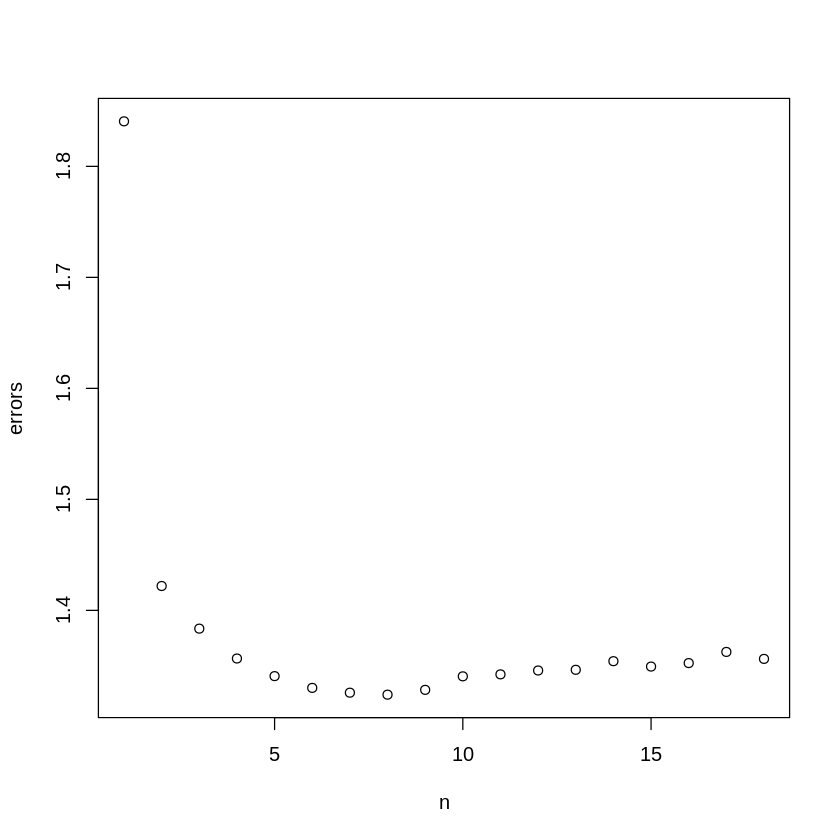

In [88]:
n = seq(1,18)
plot(n, errors)

Tel que l'on peut observer sur le graphique ci-haut, l'erreur baisse rapidement pour atteindre un minimum aux alentours de 8 clusters, avant de remonter tranquillement. Il est important de rappeller que cela est pour un sous-ensemble des données initiales, soit seulement 150 users et 200 films, et que les résultats aurait probablement été différents si les calculs avaient été faits sur les données complètes. Avec plus de temps / une meilleure parallélisation / une meilleure utilisation de librairies existantes pour optimiser les opérations matricielles et vectorielles, la même approche peut être effectuée sur les données complètes pour obtenir le nombre de clusters optimal sur toutes les données.

Il serait intéressant également de faire cette expérience sur différentes tailles d'ensemble de données afin d'essayer de déterminer une corrélation entre le nombre de clusters optimal et la quantité de données.